# Let's play with the data from SNCA!

First let's import the data from this year.


In [1]:
import requests
import re
import xml.etree.ElementTree as ET
import pandas as pd
import matplotlib.pyplot as plt

### install
# Install libraries with the following command: pip install -r requirements.txt

### config

# your API key here
key = ''

# the id of the Dataset you want to get
datasetId = 'operations-delta-des-vehicules-au-luxembourg'

# the pattern filenames should match to be downloaded

#fPattern = '^Operations_Delta_\\d{6}.xml$'
fPattern = '^Operations_Delta_202011.xml$'
### end config

url = 'https://data.public.lu/api/1/datasets/'+datasetId+'/'
headers = {'X-API-KEY': key}
r = requests.get(url, headers=headers)
r.raise_for_status()

resources = r.json()['resources']
data = []
columns = []
init = True
for i in range(len(resources)):
    if re.search(fPattern, resources[i]['title']):
        # print('Downloading: '+ resources[i]['title'])
        s = requests.get(resources[i]['url'], headers=headers)
        s.raise_for_status()
        # print('Parsing...')
        xml = ET.fromstring(s.text)
        for operation in xml:
            row = []
            for field in operation:
                if init:
                    columns.append(field.tag)
                row.append(field.text)
            init = False
            data.append(row)
df = pd.DataFrame(data, columns=columns)
print(df)



      CODEOP CATSTC CODCAR                   LIBCAR CATEU        COUL INDUTI  \
0          N     41     DC                       DC    O1                  0   
1          N     41     DC                       DC    O2                  0   
2          N     41     DC                       DC    O1                  0   
3          N     41     DC                       DC    O2                  0   
4          N     41     DC                       DC    O2                  0   
...      ...    ...    ...                      ...   ...         ...    ...   
23016     E1      2     06                     MOTO    L3  MULTICOLOR      0   
23017     E1      6     AC                       AC    M1   BLEU GRIS      0   
23018     E1      6     AC                       AC    M1   BLEU NOIR      0   
23019     E1     21     1R  PLATEAU D'ACCOUPL. FIXE    N3  BLEU ROUGE      0   
23020     E1      5     AB                       AB    M1   GRIS NOIR      0   

      PAYPVN CODMRQ          LIBMRQ  ..

Ok now we have some data, let's filter to get only private cars

In [2]:
cars = df[df["CATSTC"] == "5"]

Let's find the most frequent colors of cars in Luxembourg on the given period of time.

<AxesSubplot:ylabel='COUL'>

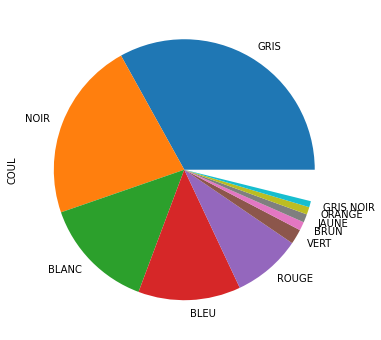

In [3]:
coul = cars['COUL'].value_counts(normalize=True).head(10)
coul.plot.pie(figsize=(6, 6),colors=['grey', 'black', 'white', 'blue', 'red', 'green', 'brown', 'yellow', 'orange', 'dark-grey'])